In [190]:
%reset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib import units
from tensorflow.keras.optimizers import Adam
import os
from glob import glob
import shutil
import time
from IPython.display import clear_output
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import shutil
import PIL
from tensorflow.keras import layers
AUTOTUNE = tf.data.AUTOTUNE

In [191]:
img_height = 180
img_width = 180
dtrain = tf.keras.utils.image_dataset_from_directory(
  './chihuahua-muffin/',
  image_size=(img_height, img_width),
  color_mode="rgb")

Found 16 files belonging to 2 classes.


In [192]:
class_names = dtrain.class_names
print(class_names)

['chihuahua', 'muffin']


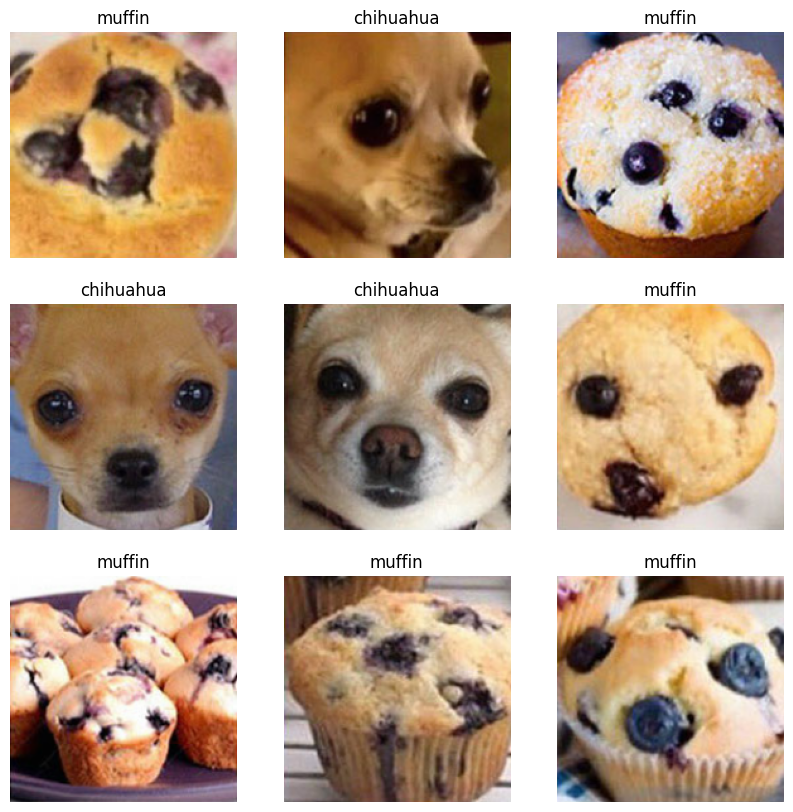

In [150]:
plt.figure(figsize=(10, 10))
for images, labels in dtrain.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [151]:
classes=len(class_names)
opt=tf.keras.optimizers.Adam(0.001)
model=tf.keras.models.Sequential()
model.add(layers.Rescaling(1./255,input_shape=(img_height, img_width, 3)))
model.add(layers.RandomFlip("horizontal",input_shape=(img_height, img_width, 3)))
model.add(layers.RandomRotation(0.1))
model.add(layers.RandomZoom(0.1))
model.add(layers.Conv2D(16,3,padding="same",activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(32,3,padding="same",activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64,3,padding="same",activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(classes))

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(dtrain,epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6873 - accuracy: 0.5625
Epoch 2/10
1/1 [==============================] - 0s 240ms/step - loss: 0.8522 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 231ms/step - loss: 1.6439 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 235ms/step - loss: 0.6353 - accuracy: 0.5625
Epoch 5/10
1/1 [==============================] - 0s 232ms/step - loss: 0.6830 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 218ms/step - loss: 0.7527 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 218ms/step - loss: 0.7198 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 234ms/step - loss: 0.6784 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 227ms/step - loss: 0.6496 - accuracy: 0.5625
Epoch 10/10
1/1 [==============================] - 0s 229ms/step - loss: 0.6858 - accuracy: 0.6250


In [12]:
history = model.fit(dtrain,epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.7333 - accuracy: 0.3750
Epoch 2/10
1/1 [==============================] - 0s 177ms/step - loss: 0.7435 - accuracy: 0.5625
Epoch 3/10
1/1 [==============================] - 0s 200ms/step - loss: 3.3072 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 166ms/step - loss: 0.7782 - accuracy: 0.4375
Epoch 5/10
1/1 [==============================] - 0s 183ms/step - loss: 1.5963 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 176ms/step - loss: 1.2540 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 184ms/step - loss: 0.6403 - accuracy: 0.5625
Epoch 8/10
1/1 [==============================] - 0s 183ms/step - loss: 0.6560 - accuracy: 0.6250
Epoch 9/10
1/1 [==============================] - 0s 171ms/step - loss: 0.6701 - accuracy: 0.5625
Epoch 10/10
1/1 [==============================] - 0s 169ms/step - loss: 0.6662 - accuracy: 0.5000


1/1 [==============================] - 0s 49ms/step
This image used to be muffin 
but most likely belongs to chihuahua 
with a 51.59 percent confidence.


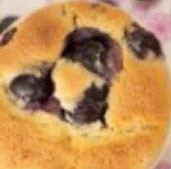

In [161]:
from random import random
img_paths = glob('./chihuahua-muffin/*/*')
ind=int(random()*len(img_paths)-1)
img = tf.keras.utils.load_img(
    img_paths[ind], target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image used to be {} \nbut most likely belongs to {} \nwith a {:.2f} percent confidence."
    .format(img_paths[ind].split("\\")[-2],class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(img_paths[ind])

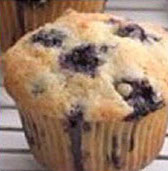

In [198]:
from random import random
img_paths = glob('./chihuahua-muffin/*/*')
ind=int(random()*len(img_paths)-1)
img = tf.keras.utils.load_img(
    img_paths[ind], target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
PIL.Image.open(img_paths[ind])

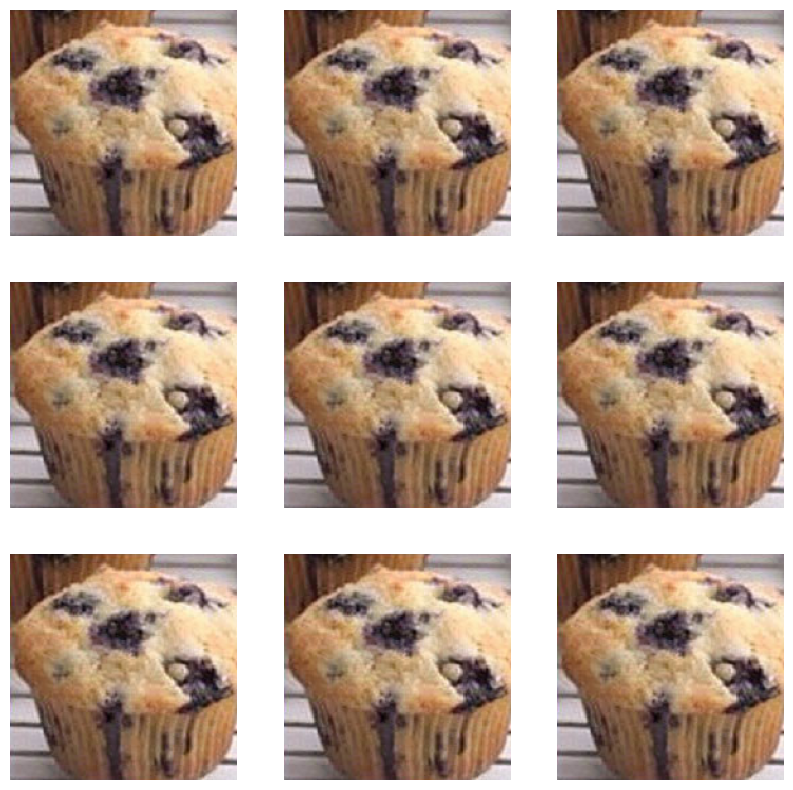

In [213]:
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.8)])

image = tf.expand_dims(img_array, 0)
plt.figure(figsize=(10, 10))

for i in range(9):
  augmented_image = data_augmentation(image)/255
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")


In [226]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import ipyplot

In [ ]:
from random import random
img_paths = glob('./chihuahua-muffin/*/*')
ind=int(random()*len(img_paths)-1)
input_img = imageio.imread(img_paths[ind])



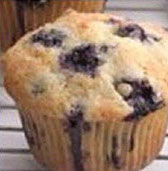
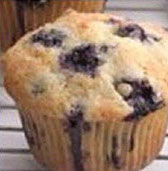
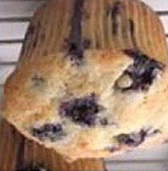


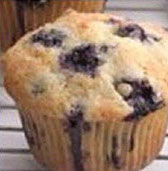
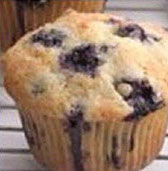
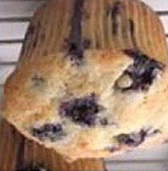

In [264]:

hflip= iaa.Fliplr(p=.5)
input= hflip.augment_image(input_img)
vflip= iaa.Flipud(p=0.5) 
input_vf= vflip.augment_image(input_img)
images_list=[input_img, input_hf, input_vf]
labels = ['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


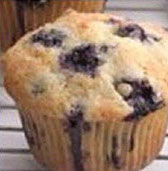
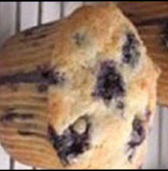


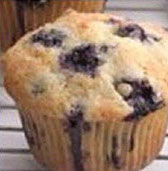
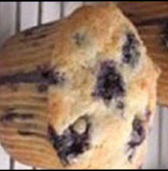

In [251]:
rot1 = iaa.Affine(rotate=(-180,180))
input_rot1 = rot1.augment_image(input_img)
images_list=[input_img, input_rot1]
labels = ['Original', 'Rotated Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


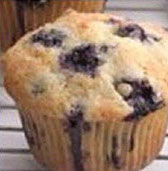
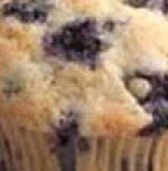


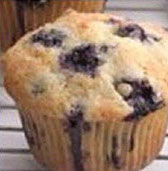
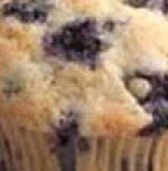

In [289]:
crop1 = iaa.Crop(percent=(0, 0.2)) 
input_crop1 = crop1.augment_image(input_img)
images_list=[input_img, input_crop1]
labels = ['Original', 'Cropped Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


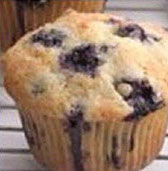
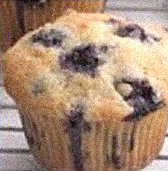


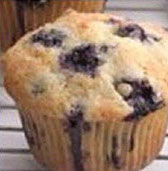
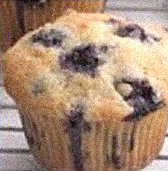

In [333]:
noise=iaa.AdditiveGaussianNoise(10,10)
input_noise=noise.augment_image(input_img)
images_list=[input_img, input_noise]
labels = ['Original', 'Gaussian Noise Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


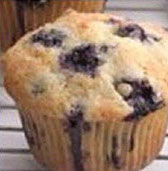
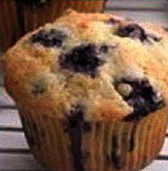
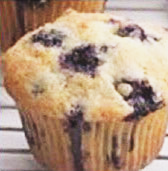
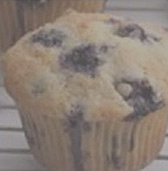


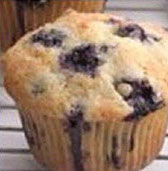
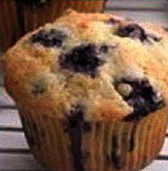
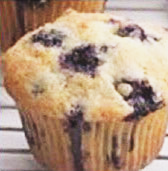
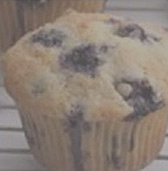

In [336]:
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
input_contrast = contrast.augment_image(input_img)
sigmoid_contrast = contrast_sig.augment_image(input_img)
linear_contrast = contrast_lin.augment_image(input_img)
images_list=[input_img, input_contrast,sigmoid_contrast,linear_contrast]
labels = ['Original', 'Gamma Contrast','SigmoidContrast','LinearContrast']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


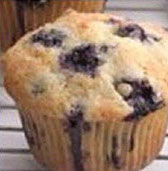
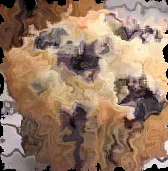
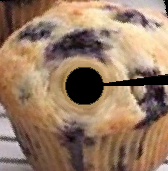
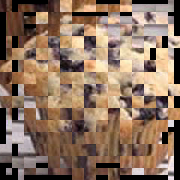


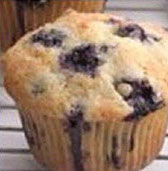
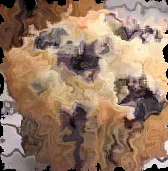
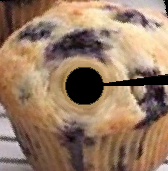
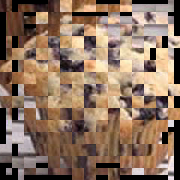

In [362]:
elastic = iaa.ElasticTransformation(alpha=60.0, sigma=4.0)
polar = iaa.WithPolarWarping(iaa.CropAndPad(percent=(-0.1, 0.2)))
jigsaw = iaa.Jigsaw(nb_rows=15, nb_cols=15, max_steps=(6, 7))
input_elastic = elastic.augment_image(input_img)
input_polar = polar.augment_image(input_img)
input_jigsaw = jigsaw.augment_image(input_img)
images_list=[input_img, input_elastic,input_polar,input_jigsaw]
labels = ['Original', 'elastic','polar','jigsaw']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

In [ ]:
def aug_img(input):
    hflip= iaa.Fliplr(p=.5)
    input= hflip.augment_image(input)
    vflip= iaa.Flipud(p=0.5) 
    input= vflip.augment_image(input)
    rot1 = iaa.Affine(rotate=(-180,180))
    input= rot1.augment_image(input)
    crop1 = iaa.Crop(percent=(0, 0.2)) 
    input = crop1.augment_image(input)
    noise=iaa.AdditiveGaussianNoise(10,10)
    input=noise.augment_image(input)
    contrast=iaa.GammaContrast((0.5, 2.0))
    contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
    contrast_lin = iaa.LinearContrast((0.6, 0.4))
    input= contrast.augment_image(input_img)
    input = contrast_sig.augment_image(input_img)
    input = contrast_lin.augment_image(input_img)
    